In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySCSS as ss
import Thermobar as pt
pd.options.display.max_columns = None

## Test 1 - Calculating ONeill SCSS using a fixed FeFeCuNi ratio

In [2]:
#Liqs=ss.import_data('Clean_Oneill_SCSSCalc_July2020_Fixed_Sulfide.xlsx', sheet_name="Python_Input")
Liqs=pd.read_excel('Clean_Oneill_SCSSCalc_July2020_Fixed_Sulfide.xlsx', sheet_name="Python_Input")

In [4]:
Sulf_Sat1=ss.calculate_ONeill2021_SCSS(df=Liqs, T_K=Liqs['T_K'], P_kbar=Liqs['P_kbar'], 
                            Fe_FeNiCu_Sulf=Liqs['Fe_FeNiCu_Sulf'], Fe3Fet_Liq=1-Liqs['Fe2FeT_Liq'])

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


Text(0, 0.5, 'Discprenecy (Python - Excel)')

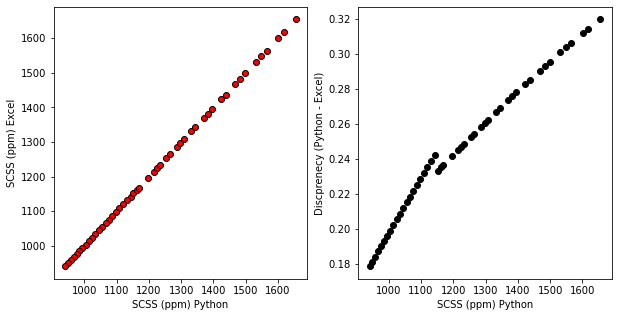

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Sulf_Sat1['SCSS2_ppm'], Liqs['SCSS_Calc'], 'ok', mfc='red')
ax1.set_xlabel('SCSS (ppm) Python')
ax1.set_ylabel('SCSS (ppm) Excel')

ax2.plot(Sulf_Sat1['SCSS2_ppm'], Sulf_Sat1['SCSS2_ppm']-Liqs['SCSS_Calc'], 'ok')
ax2.set_xlabel('SCSS (ppm) Python')
ax2.set_ylabel('Discprenecy (Python - Excel)')

## Test 2 - Calculating using the full O'Neill set up (O'Neill Fe3, and sulfide composition)

In [7]:
Liqs2=pd.read_excel('Clean_Oneill_SCSSCalc_July2020_Calc_Sulf.xlsx', sheet_name="Python_Input")
Liqs_2=Liqs2.iloc[0:49]

In [10]:
Sulf_Sat2=ss.calculate_ONeill2021_SCSS(df=Liqs2, T_K=Liqs2['T_K'], P_kbar=Liqs2['P_kbar'], 
                                   Ni_Liq=Liqs2['Ni(ppm)'],  Cu_Liq=Liqs2['Cu(ppm)'],
                            Fe_FeNiCu_Sulf="Calc_ONeill", Fe3Fet_Liq="Calc_ONeill")

Calculating Sulf composition using Scipy minimisation of Kiseeva et al. (2015) Kd Values for Ni and Cu


Text(0, 0.5, 'Discprenecy (Python - Excel)')

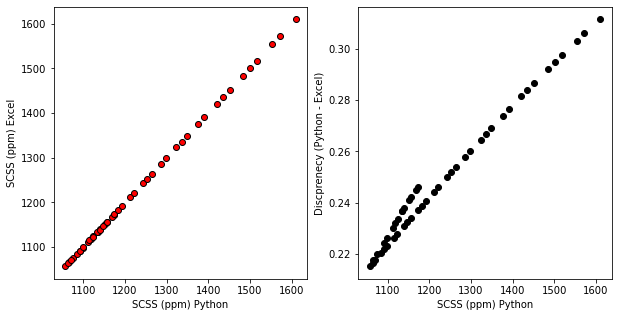

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Sulf_Sat2['SCSS2_ppm'], Liqs_2['SCSS_Calc'], 'ok', mfc='red')
ax1.set_xlabel('SCSS (ppm) Python')
ax1.set_ylabel('SCSS (ppm) Excel')

ax2.plot(Sulf_Sat2['SCSS2_ppm'], Sulf_Sat2['SCSS2_ppm']-Liqs2['SCSS_Calc'], 'ok')
ax2.set_xlabel('SCSS (ppm) Python')
ax2.set_ylabel('Discprenecy (Python - Excel)')